<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd

Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UDKAZw-kz18Yj8P6icf_qw/survey-data-duplicates.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
#df.loc[df.duplicated()]
duplicates = df[df.duplicated(keep=False)]
df1 = pd.DataFrame(duplicates)
df1.shape

(20, 114)

### Task 2: Analyze Characteristics of Duplicates
1. Identify which columns have the same values in duplicate rows.
2. Analyze the distribution of duplicates across different columns such as Country, Employment, and DevType.


In [30]:
pd.set_option('display.max_rows', 500)
df1['Country'].head(20)
df_country = df1.groupby('Country')['Country'].count()
df_country = pd.DataFrame(df_country)
df_country.rename(columns ={'Country' : 'Count'}, inplace = True)
df_country.reset_index(inplace = True)
df_country['Count'] = df_country['Count']/2

df_employment = df1.groupby('Employment')['Employment'].count()
df_employment = pd.DataFrame(df_employment)
df_employment.rename(columns ={'Employment' : 'Count'}, inplace = True)
df_employment.reset_index(inplace = True)
df_employment['Count'] = df_employment['Count']/2

df_employment.head(10)

,Employment,Count
0,"Employed, full-time",5.0
1,"Independent contractor, freelancer, or self-em...",1.0
2,"Student, full-time",3.0
3,"Student, full-time;Not employed, but looking f...",1.0


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


Text(0, 0.5, 'Countries')

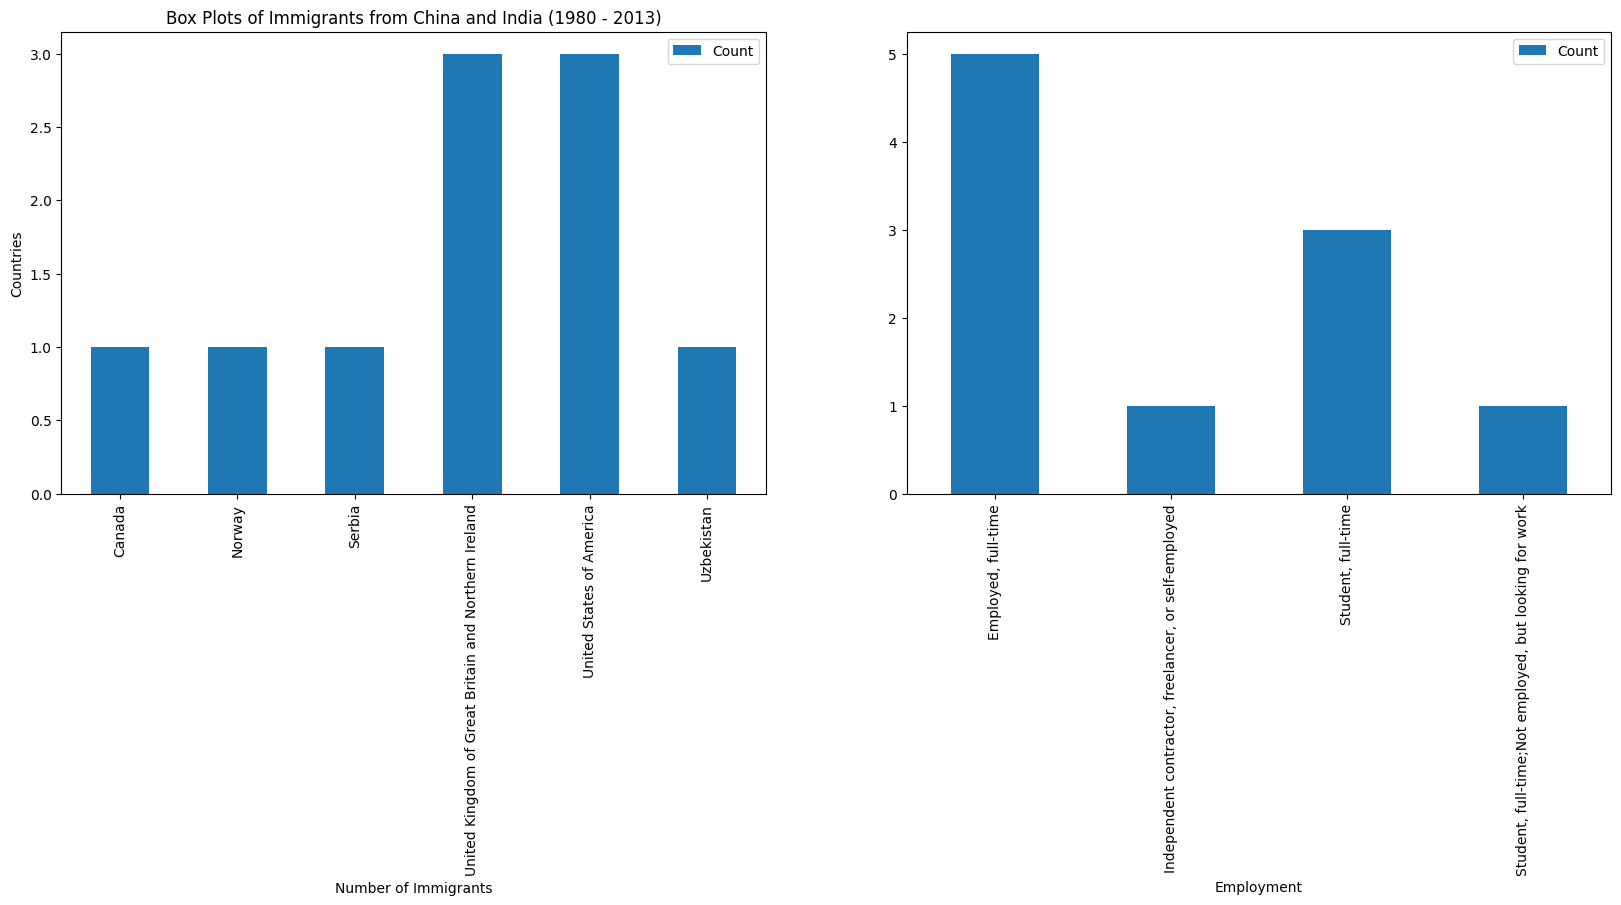

In [31]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: bar plot
df_country.plot(kind='bar', x = 'Country', y='Count', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Bar plot showing duplicated countries in dataset and frequency of duplication')
ax0.set_xlabel('Countries')
ax0.set_ylabel('Count')

# Subplot 2: bar plot
df_employment.plot(kind='bar', x = 'Employment', y='Count', figsize=(20, 6), ax=ax1) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [38]:
pd.set_option('display.max_columns', None)
df = df.drop_duplicates()
df.describe(include=['object'])

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,65437,65437,65437,54806,65437,54466,60784,60488,49237,40897,59869,51610,59445,47480,47406,45181,43358,43668,58930,46684,59745,55752,50872,50254,42558,38557,42366,34532,31377,45161,38535,34943,22214,17600,16733,39443,32964,29596,52482,46084,43997,57592,52087,50711,58174,52973,48093,38966,37204,55545,46711,44712,44453,36701,35543,60286,59536,59560,45237,58962,59163,60907,45873,36894,37302,37021,35072,30691,24414,13438,12498,24428,2355,1148,44689,41548,37531,44477,29801,28664,28021,28095,28030,27880,27864,27778,27758,27635,28369,28364,27710,28911,28844,28251,27764,28491,28807,28858,56182,56238
unique,5,8,110,3,1,118,8,418,10853,113,52,52,34,10,3,215,3,386,185,142,23864,22769,12335,9050,8478,4051,5467,4784,2556,12235,11654,5460,1630,1471,1053,9288,10263,4917,19883,16549,11804,14168,9751,7545,2488,2032,6014,3801,2661,5049,3205,2555,2663,2361,1488,32,5,3,6,111,6,3,6,113,5,5,1310,1949,1531,700,539,884,249,286,3,126,232,2,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,954,514,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,2,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,HTML/CSS;JavaScript;TypeScript,Python,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,React,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+),.NET (5+),.NET (5+),Docker,Docker,Docker,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,Jira,Jira,Microsoft Teams,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,ChatGPT,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"No, not really",Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase,Project planning,Search for answer

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
